In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Base de dados do MovieLens (https://files.grouplens.org/datasets/movielens/ml-25m.zip)
# Crianto data frames com os dados dos filmes e das avaliações
ratings_data_frame = pd.read_csv('../dados/ratings.csv')
movies_data_frame = pd.read_csv('../dados/movies.csv')

print(f"ratings.csv\n{ratings_data_frame.head(2)}\n")
print(f"movies.csv\n{movies_data_frame.head(2)}")

ratings.csv
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247

movies.csv
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy


In [7]:
# Calculando a média de avaliação dos 3 primeiros filmes de movies.csv
for index, row in movies_data_frame.head(3).iterrows():
    movie_id = row['movieId']
    movie_title = row['title']
    
    average_rating = ratings_data_frame.query(f'movieId=={movie_id}')['rating'].mean()

    if not math.isnan(average_rating):
        print(f"O filme {movie_title} tem média {average_rating}")

O filme Toy Story (1995) tem média 3.9209302325581397
O filme Jumanji (1995) tem média 3.4318181818181817
O filme Grumpier Old Men (1995) tem média 3.2596153846153846


In [4]:
# Utilizando group by para obter média de notas
ratings_grouped_by_movie_id = ratings_data_frame.groupby('movieId') # Agrupa todos os dados de acordo com o id do filme
movies_rating_mean = ratings_grouped_by_movie_id['rating'].mean()
movies_rating_mean.to_frame().reset_index().head(3)

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615


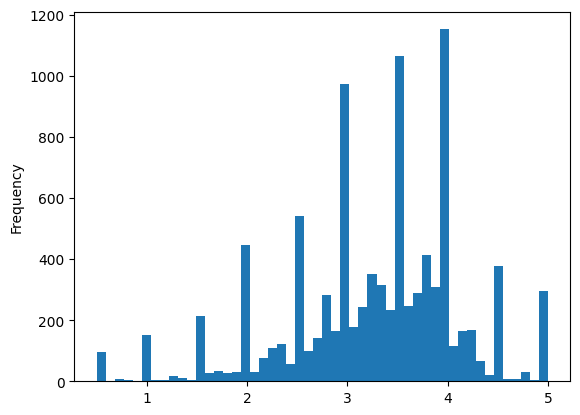

In [8]:
# Gráfico que mostra a distribuição das médias de notas
# O parametro "bins" indica a quantidade de espaços (buckets) em que as notas serão agrupadas
movies_rating_mean.plot(kind='hist', bins=50)
plt.show()

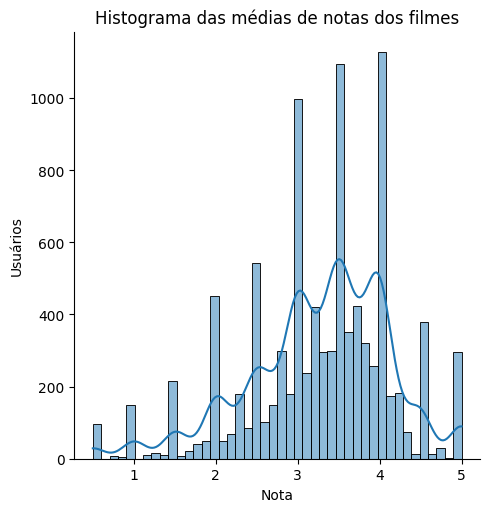

In [6]:
# Tentativa de desenhar uma curva que mostra o comportamento da distribuição das notas
sns.displot(movies_rating_mean, kde=True)
plt.title('Histograma das médias de notas dos filmes')
plt.ylabel('Usuários')
plt.xlabel('Nota')
plt.show()